<a href="https://colab.research.google.com/github/AntoninaBarsukova/Coursera-ML/blob/main/CO_2_injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
path = "/content/table_for_pythonL4A1.xlsx"

wb_obj = openpyxl.load_workbook(path)

sheet_obj = wb_obj.active

In [ ]:
#Cement Class G+Silica Four
#Liner 7''
  # pc - cement pore pressure
  # sigmah formtion Shmax
for i in range(20, 21):
  R_1 = sheet_obj.cell(row=i, column=3).value
  R_2 = sheet_obj.cell(row=i, column=4).value
  R_3 = sheet_obj.cell(row=i, column=15).value
  R_4 = 1
  R_5 = 10
  R_6 = 100
  R_7 = 500
  R_8 = 1000
  R_9 = 2000
  alpha_1 = sheet_obj.cell(row=i, column=7).value
  alpha_2 = sheet_obj.cell(row=i, column=18).value
  alpha_3 = sheet_obj.cell(row=i, column=28).value
  alpha_10 = sheet_obj.cell(row=i, column=28).value
  E_1 = sheet_obj.cell(row=i, column=5).value
  E_2 = sheet_obj.cell(row=i, column=16).value
  E_3 = sheet_obj.cell(row=i, column=26).value
  E_10 = sheet_obj.cell(row=i, column=26).value
  nu_1 = sheet_obj.cell(row=i, column=6).value
  nu_2 = sheet_obj.cell(row=i, column=17).value
  nu_3 = sheet_obj.cell(row=i, column=27).value
  nu_10 = sheet_obj.cell(row=i, column=27).value
  dT = sheet_obj.cell(row=i, column=35).value
  dPf = sheet_obj.cell(row=i, column=2).value
  pc = sheet_obj.cell(row=i, column=38).value
  sigmah = sheet_obj.cell(row=i, column=39).value
  deltasigmah = sheet_obj.cell(row=i, column=43).value
  deltapfreservoir = sheet_obj.cell(row=i, column=44).value


  biot_1 = 0
  biot_2 = 0.8
  biot_3 = 0.8
  biot_4 = 0.8
  biot_5 = biot_6 = biot_7 = biot_8 = biot_9 = biot_4
  

  K_1 = E_1 / 3 / (1 - 2 * nu_1)
  G_1 = E_1 / 2 / (1 + nu_1)
  K_2 = E_2 / 3 / (1 - 2 * nu_2)
  G_2 = E_2 / 2 / (1 + nu_2)
  K_3 = E_3 / 3 / (1 - 2 * nu_3)
  G_3 = E_3 / 2 / (1 + nu_3)
  K_4 = K_5 = K_6 = K_7 = K_8 = K_9 = K_3
  G_4 = G_5 = G_6 = G_7 = G_8 = G_9 = G_3
  K_10 = E_10 / 3 / (1 - 2 * nu_10)
  G_10 = E_10 / 2 / (1 + nu_10)
  sheet_obj.cell(row=i, column=10).value = K_1
  sheet_obj.cell(row=i, column=11).value = G_1
  sheet_obj.cell(row=i, column=21).value = K_2
  sheet_obj.cell(row=i, column=22).value = G_2
  sheet_obj.cell(row=i, column=31).value = K_10
  sheet_obj.cell(row=i, column=32).value = G_10
  r_1 = np.linspace(R_1, R_2)
  r_2 = np.linspace(R_2, R_3)
  r_3 = np.linspace(R_3, R_4)
  r_4 = np.linspace(R_4, R_5)
  r_5 = np.linspace(R_5, R_6)
  r_6 = np.linspace(R_6, R_7)
  r_7 = np.linspace(R_7, R_8)
  r_8 = np.linspace(R_8, R_9)
  r_9 = np.linspace(R_9, 5* R_9)

  n5 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
               [0, 0, 1, R_2**2 / R_3**2, -1]])   
                                                                                                                                    
  l5 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_10 * alpha_2 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])       
     
print(deltapfreservoir)

42.3


In [ ]:
# Initial state of stress in the host rock
 # pc - cement pore pressure (hydrostatic)
 # sigmah-  formtion Shmax

for i in range(6, 20):
  A_ri = -0.5 * sigmah * 1/(K_10 - ((K_10 - 2 * G_10 / 3)**2) / (K_10 + 4 * G_10 / 3))
  B_ri = (pc - sigmah) * R_3**2 / (2 * G_10)

  sheet_obj.cell(row=i, column=36).value = A_ri
  sheet_obj.cell(row=i, column=37).value = B_ri

A_ri, B_ri

(-0.005775528501228502, 2.897103047563626e-06)

In [ ]:
# Initial state of  radial stress in the host rock

In [ ]:
for i in range(20, 21):
  def n(sigmah, pc, R, r):
    return - sigmah - (pc - sigmah) * R**2 / r**2 

In [ ]:
for i in range(20, 21):
  n3 = n(sigmah, pc, R_3, r_3)

n3, r_3



(array([-68.71837   , -68.08761931, -67.69350108, -67.43090917,
        -67.24722026, -67.11372016, -67.0136607 , -66.93673879,
        -66.87633402, -66.82803499, -66.78881043, -66.7565217 ,
        -66.72962499, -66.70698328, -66.68774421, -66.67125861,
        -66.65702506, -66.64465129, -66.63382688, -66.62430354,
        -66.61588083, -66.60839544, -66.60171329, -66.59572344,
        -66.59033345, -66.58546581, -66.58105516, -66.57704601,
        -66.57339109, -66.57004986, -66.56698742, -66.56417359,
        -66.56158218, -66.55919035, -66.55697811, -66.55492793,
        -66.55302436, -66.55125374, -66.54960398, -66.54806432,
        -66.54662518, -66.54527799, -66.54401508, -66.54282958,
        -66.54171527, -66.54066657, -66.53967843, -66.53874628,
        -66.53786596, -66.5370337 ]),
 array([0.108     , 0.12783673, 0.14767347, 0.1675102 , 0.18734694,
        0.20718367, 0.22702041, 0.24685714, 0.26669388, 0.28653061,
        0.30636735, 0.32620408, 0.34604082, 0.36587755, 0.

In [ ]:
sigmah

66.515

In [ ]:
pc

68.71837

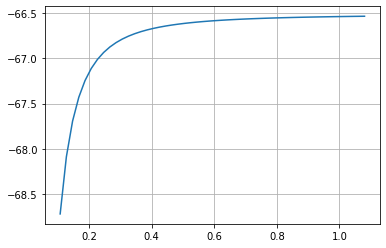

In [ ]:
 #Init radial stress rock
 for i in range(20, 21):
   plt.plot(r_3, n3)
   plt.grid(True)


In [ ]:
df = pd.DataFrame(r_3, n3)
df.to_csv("out.csv")

df

In [ ]:
# Initial state of hoop stress in the host rock


for i in range(20, 21):
  def h(sigmah, K, G, pc, R, r):
    return - sigmah * 9 * K / (8 * K - 4 / (3 * G)) + (pc - sigmah) * R**2 / r**2
    

In [ ]:
for i in range(6, 20):
  h3 = h(sigmah, K_10, G_10, pc, R_3, r_3)


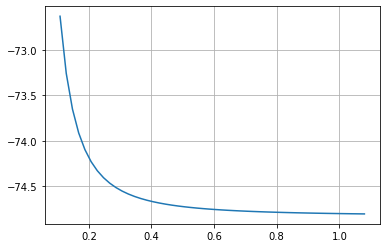

In [ ]:
for i in range(20, 21):
   plt.plot(r_3, h3)
   plt.grid(True)

In [ ]:
dl = pd.DataFrame(r_3, h3)
dl.to_csv("out.csv")

dl



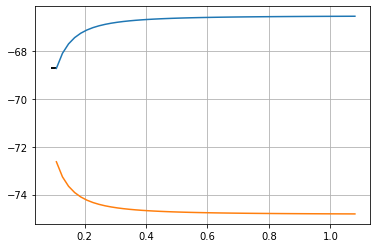

In [ ]:
for i in range(20, 21):
   plt.plot(r_3, n3)
   plt.plot(r_3, h3)
   #plt.hlines((-sigmah, -sigmah), r_3, 10 * r_3)
   plt.hlines((-pc, -pc), R_2, R_3)
   plt.grid(True)

In [ ]:
wb_obj.save("/content/table_for_pythonL4A1.xlsx")

In [ ]:
# depletion stage

In [ ]:
#gas depletion
# deltapfreservoir is the defference between reservoir pressure at the beginning and in the end of production. Here we use it as delta infinity which is 
# deltainfinity = alpha*delta temperature + beta*delta reservoir pressure
# delta temperature = 0 for production stage
# beta = biot coefficient, beta = 0 for casing, 0.75 for cement and 0.8 for the rock
# deltasigmah is the difference Shmax before and after production in the rock

print(K_10)
print(deltapfreservoir)
print(deltasigmah)
print(G_10)

7051.282051282051
42.3
25
4435.483870967742


In [ ]:
G_depl_1 = 2 * G_1 / ( K_1 + 4 * G_1 / 3)
G_depl_2 = 2 * G_2 / ( K_2 + 4 * G_2 / 3)
G_depl_3 = 2 * G_10 / ( K_10 + 4 * G_10 / 3)

print(G_depl_1)
print(G_depl_2)
print(G_depl_3)

0.5714285714285714
0.75
0.6842105263157895


In [ ]:
biot_1 = 0
biot_2 = 0.8
biot_3 = 0.8

delta_infinity_1 = 0
delta_infinity_2 = biot_2 * deltapfreservoir
delta_infinity_3 = biot_3 * deltapfreservoir

#deltamudpressure - diffecrence between mud pressure and the reservoir fluid pressure at the end of production
deltamudpressure = -34

print(delta_infinity_2)
print(delta_infinity_3)

33.839999999999996
33.839999999999996


In [ ]:
for i in range(20, 21):
  A_3_depl = (1 / (3 * K_10)) * (delta_infinity_3 + deltasigmah * (K_10 + 4 * G_10 / 3)/ (2 * G_10))

  print(A_3_depl)

0.0033269818181818176


In [ ]:
for i in range(20, 21):
  b5 = np.array([[3 * G_depl_1 * K_1, -2 * G_1, 0, 0, 0],                                                                 
                [3 * (G_depl_1 * K_1), -2 * G_1 * (R_1 / R_2)**2, -3 * G_depl_2 * K_2, 2 * G_2, 0],                       
                [1, (R_1 / R_2)**2, -1, -1, 0],                                                                                                                                        
                [0, 0, 3 * G_depl_2 * K_2, -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
                [0, 0, 1, (R_2 / R_3)**2, -1]])   

  print(b5) 


In [ ]:
# Calculation the inverse matrix
for i in range(20, 21):
  bb5 =np.linalg.inv(b5)

print(bb5)

In [ ]:
#Vector

for i in range(20, 21):
  c5 = np.array([[ - deltamudpressure],
                [- G_depl_2 * delta_infinity_2],
                [0],
                [G_depl_2 * delta_infinity_2 - G_depl_3 * delta_infinity_3 + 3 * G_depl_3 * K_10 * A_3_depl],
                [A_3_depl]])   
  
  print(c5) 


[[ 3.40000000e+01]
 [-2.53800000e+01]
 [ 0.00000000e+00]
 [ 5.03800000e+01]
 [ 3.32698182e-03]]


In [ ]:
#Multiplication of the inverse matrix by vector

for i in range(20, 21):
  aa = bb5.dot(c5)

print(aa)

In [ ]:
for i in range(20, 21):
  A_1_depl = aa[0]
  B_1_depl = aa[1] * R_1**2
  A_2_depl = aa[2]
  B_2_depl = aa[3] * R_2**2 
  B_3_depl = aa[4] * R_3**2
  
  sheet_obj.cell(row=i, column=12).value = A_1_depl[0]
  sheet_obj.cell(row=i, column=13).value = B_1_depl[0]
  sheet_obj.cell(row=i, column=23).value = A_2_depl[0]
  sheet_obj.cell(row=i, column=24).value = B_2_depl[0]
  sheet_obj.cell(row=i, column=33).value = A_3_depl
  sheet_obj.cell(row=i, column=34).value = B_3_depl[0]

  A_depl_1 = A_1_depl[0]
  B_depl_1 =B_1_depl[0]
  A_depl_2 = A_2_depl[0]
  B_depl_2 = B_2_depl[0]
  A_depl_3 = A_3_depl
  B_depl_3 = B_3_depl[0]


A_1_depl

A_1_depl

A_depl_1, B_1_depl, A_2_depl, B_2_depl, A_3_depl,  B_3_depl

(0.0003564225252811176,
 array([2.7984705e-06]),
 array([0.00326482]),
 array([-2.02389716e-05]),
 0.0033269818181818176,
 array([-2.09639892e-05]))

In [ ]:
# Radial stress change after depletion

def sigma_r_depl(G_depl, A_depl, K, delta_infinity, G, B_depl, r ):
    return G_depl * (3 * A_depl * K - delta_infinity) - 2 * G * B_depl / r**2

In [ ]:
#sigma_r_depl1 = G_depl_1 * (3 * A_1_depl * K_1 - delta_infinity_1) + 2 * G_1 * B_1_depl / R_1**2

#sigma_r_depl1



176.79846495197523

In [ ]:

for i in range(20, 21):
  # steel
  sigma_r_depl1 =  sigma_r_depl(G_depl_1, A_depl_1, K_1, delta_infinity_1, G_1, B_depl_1, r_1)
  # cement
  sigma_r_depl2 =  sigma_r_depl(G_depl_2, A_depl_2, K_2, delta_infinity_2, G_2, B_depl_2, r_2)
  # formation
  sigma_r_depl3 =  sigma_r_depl(G_depl_3, A_depl_3, K_10, delta_infinity_3, G_10, B_depl_3, r_3)

In [ ]:
#displacemet


def e_r(r, A, B):
    return A * r + B / r


In [ ]:
for i in range(20, 21):
  # cement
  e_r2 = e_r(r_2, A_2_depl, B_2_depl)
  # steel
  e_r1 = e_r(r_1, A_1_depl, B_1_depl)
  # formation
  e_r3 = e_r(r_3, A_3_depl, B_3_depl)

print(e_r1)
print(e_r2)
print(e_r3)

NameError: ignored

In [ ]:
#displacement

plt.plot(r_1, e_r1)
plt.plot(r_2, e_r2)
plt.plot(r_3, e_r3)
plt.grid()

NameError: ignored

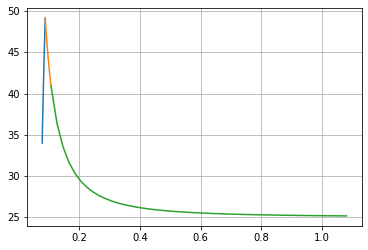

In [ ]:
#radial stress
plt.plot(r_1, sigma_r_depl1)
plt.plot(r_2, sigma_r_depl2)
plt.plot(r_3, sigma_r_depl3)
plt.grid()


In [ ]:
df = pd.DataFrame(r_1, sigma_r_depl1)
dk = pd.DataFrame(r_2, sigma_r_depl2)
di = pd.DataFrame(r_3, sigma_r_depl3)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")


print(df)
print(dk)
print(di)

In [ ]:
# Hoop stress change after depletion

def sigma_h_depl(G_depl, A_depl, K, delta_infinity, G, B_depl, r ):
    return G_depl * (3 * A_depl * K - delta_infinity) + 2 * G * B_depl / r**2

In [ ]:

for i in range(20, 21):
  # steel
  sigma_h_depl1 =  sigma_h_depl(G_depl_1, A_depl_1, K_1, delta_infinity_1, G_1, B_depl_1, r_1)
  # cement
  sigma_h_depl2 =  sigma_h_depl(G_depl_2, A_depl_2, K_2, delta_infinity_2, G_2, B_depl_2, r_2)
  # formation
  sigma_h_depl3 =  sigma_h_depl(G_depl_3, A_depl_3, K_10, delta_infinity_3, G_10, B_depl_3, r_3)

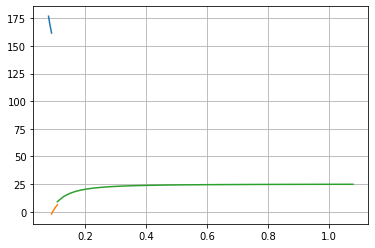

In [ ]:
#hoop stress
plt.plot(r_1, sigma_h_depl1)
plt.plot(r_2, sigma_h_depl2)
plt.plot(r_3, sigma_h_depl3)
plt.grid()

In [ ]:
df = pd.DataFrame(r_1, sigma_h_depl1)
dk = pd.DataFrame(r_2, sigma_h_depl2)
di = pd.DataFrame(r_3, sigma_h_depl3)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")


print(df)
print(dk)
print(di)

In [ ]:
#vertical stress change is zero

In [ ]:
#the end of depletion stage

In [ ]:
####################################

#Injection

####################################

In [ ]:
delta_T = -110
#dPf_inj is the defference between reservoir pressure at the end of injection and at the end of production.
#dPw_inj - difference between reservoir pressure at the end of production and injection pressure
# injection pressure after one month is 9.8 MPa, pore pressure at the end of production is 2 MPa
dPf_inj = 9.8 - 2
dPw_inj = 9.8 - 2

dPf_inj_1 = 9.8 - 2       #    9.8 - 2
dPf_inj_2 = 9.78 - 2      #    9.8 - 2  #9.78 - 2
dPf_inj_3 = 9.75 - 2      #    9.8 - 2  #9.75 - 2
dPf_inj_4 = 9.38 - 2      #    9.8 - 2  #9.38 - 2
dPf_inj_5 = 9.26 - 2      #    9.8 - 2  #9.26 - 2
dPf_inj_6 = 8.43 - 2      #    9.8 - 2  #8.43 - 2
dPf_inj_7 = 5.52 - 2      #    2 - 2  #0  #5.52 - 2
dPf_inj_8 = 2.37 - 2      #    2 - 2  #0  #2.37 - 2
dPf_inj_9 = 0             #    2 - 2

In [ ]:
# injection 1 month
delta_T_1 = -106.7
delta_T_2 = -106.7
delta_T_3 = -106.7
delta_T_4 = -106.7
delta_T_5 = -106.7
delta_T_6 = -106.7    
delta_T_7 = 0
delta_T_8 = 0
delta_T_9 = 0






In [ ]:
delta_inj_1 = 3 * K_1 * alpha_1  * delta_T_1
delta_inj_2 = 3 * K_2 * alpha_2  * delta_T_2 + biot_2 * dPf_inj_2
delta_inj_3 = 3 * K_3 * alpha_3  * delta_T_3 + biot_3 * dPf_inj_3
delta_inj_4 = 3 * K_4 * alpha_3  * delta_T_4 + biot_3 * dPf_inj_4
delta_inj_5 = 3 * K_5 * alpha_3  * delta_T_5 + biot_3 * dPf_inj_5
delta_inj_6 = 3 * K_6 * alpha_3  * delta_T_6 + biot_3 * dPf_inj_6
delta_inj_7 = 3 * K_7 * alpha_3  * delta_T_7 + biot_3 * dPf_inj_7
delta_inj_8 = 3 * K_8 * alpha_3  * delta_T_8 + biot_3 * dPf_inj_8
delta_inj_9 = 0

print(delta_inj_1)
print(delta_inj_2)
print(delta_inj_3)
print(delta_inj_4)
print(delta_inj_5)
print(delta_inj_6)
print(delta_inj_7)
print(delta_inj_8)
print(delta_inj_9)

-685.798245
-12.982
-16.37115384615385
-16.667153846153848
-16.76315384615385
-17.42715384615385
2.816
0.2960000000000001
0


In [ ]:
#9 layers
#for i in range(20, 21):
k9 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 + G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 + G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 + G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 + G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 + G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 + G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, 2 * G_10],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1]])



l9 = np.array([[delta_inj_1 - dPw_inj],
               [delta_inj_1 - delta_inj_2],
               [0],
               [delta_inj_2 - delta_inj_3],
               [0],
               [delta_inj_3 - delta_inj_4],
               [0],
               [delta_inj_4 - delta_inj_5],
               [0],
               [delta_inj_5 - delta_inj_6],
               [0],
               [delta_inj_6 - delta_inj_7],
               [0],
               [delta_inj_7 - delta_inj_8],
               [0],
               [delta_inj_8],
               [0]])


# Calculation the inverse matrix

kk9 =np.linalg.inv(k9)

ff = kk9.dot(l9)

l9


array([[-6.93598245e+02],
       [-6.72816245e+02],
       [ 0.00000000e+00],
       [ 3.38915385e+00],
       [ 0.00000000e+00],
       [ 2.96000000e-01],
       [ 0.00000000e+00],
       [ 9.60000000e-02],
       [ 0.00000000e+00],
       [ 6.64000000e-01],
       [ 0.00000000e+00],
       [-2.02431538e+01],
       [ 0.00000000e+00],
       [ 2.52000000e+00],
       [ 0.00000000e+00],
       [ 2.96000000e-01],
       [ 0.00000000e+00]])

In [ ]:
for i in range(20, 21):
  A_1_inj = ff[0]
  B_1_inj = ff[1] * R_1**2
  A_2_inj = ff[2]
  B_2_inj = ff[3] * R_2**2 
  A_3_inj = ff[4]
  B_3_inj = ff[5] * R_3**2
  A_4_inj = ff[6]
  B_4_inj = ff[7] * R_4**2
  A_5_inj = ff[8]
  B_5_inj = ff[9] * R_5**2
  A_6_inj = ff[10]
  B_6_inj = ff[11] * R_6**2
  A_7_inj = ff[12]
  B_7_inj = ff[13] * R_7**2
  A_8_inj = ff[14]
  B_8_inj = ff[15] * R_8**2
  A_9_inj = 0
  B_9_inj = ff[16] * R_9**2

  
  sheet_obj.cell(row=i, column=12).value = A_1_inj[0]
  sheet_obj.cell(row=i, column=13).value = B_1_inj[0]
  sheet_obj.cell(row=i, column=23).value = A_2_inj[0]
  sheet_obj.cell(row=i, column=24).value = B_2_inj[0]
  sheet_obj.cell(row=i, column=33).value = A_3_inj[0]
  sheet_obj.cell(row=i, column=34).value = B_3_inj[0]

  A_inj_1 = A_1_inj[0]
  B_inj_1 = B_1_inj[0]
  A_inj_2 = A_2_inj[0]
  B_inj_2 = B_2_inj[0]
  A_inj_3 = A_3_inj[0]
  B_inj_3 = B_3_inj[0]
  A_inj_4 = A_4_inj[0]
  B_inj_4 = B_4_inj[0]
  A_inj_5 = A_5_inj[0]
  B_inj_5 = B_5_inj[0]
  A_inj_6 = A_6_inj[0]
  B_inj_6 = B_6_inj[0]
  A_inj_7 = A_7_inj[0]
  B_inj_7 = B_7_inj[0]
  A_inj_8 = A_8_inj[0]
  B_inj_8 = B_8_inj[0]
  A_inj_9 = A_9_inj
  B_inj_9 = B_9_inj[0]





A_inj_1, B_1_inj, A_2_inj, B_2_inj, A_3_inj,  B_3_inj

(-0.0015305071981425462,
 array([3.30562686e-06]),
 array([-0.00052598]),
 array([-4.65125196e-06]),
 array([-0.00063135]),
 array([-3.42222475e-06]))

In [ ]:
#displacement

def e_inj(r, A_inj, B_inj):
    return A_inj * r + B_inj / r


In [ ]:
# displacement

for i in range(20, 21):
  # cement
  e_inj_2 = e_inj(r_2, A_inj_2, B_inj_2)
  # steel
  e_inj_1 = e_inj(r_1, A_inj_1, B_inj_1)
  # formation
  e_inj_3 = e_inj(r_3, A_inj_3, B_inj_3)
  # formation
  e_inj_4 = e_inj(r_4, A_inj_4, B_inj_4)
  e_inj_5 = e_inj(r_5, A_inj_5, B_inj_5)
  e_inj_6 = e_inj(r_6, A_inj_6, B_inj_6)
  e_inj_7 = e_inj(r_7, A_inj_7, B_inj_7)
  e_inj_8 = e_inj(r_8, A_inj_8, B_inj_8)
  e_inj_9 = e_inj(r_9, A_inj_9, B_inj_9)






  #sheet_obj.cell(row=i, column=8).value = u1
  #sheet_obj.cell(row=i, column=19).value = u2
  #sheet_obj.cell(row=i, column=29).value = u3

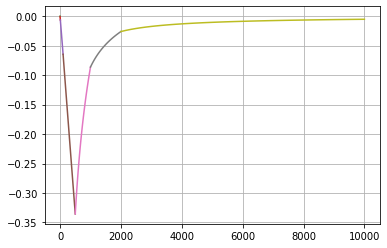

In [ ]:
plt.plot(r_1, e_inj_1)
plt.plot(r_2, e_inj_2)
plt.plot(r_3, e_inj_3)
plt.plot(r_4, e_inj_4)
plt.plot(r_5, e_inj_5)
plt.plot(r_6, e_inj_6)
plt.plot(r_7, e_inj_7)
plt.plot(r_8, e_inj_8)
plt.plot(r_9, e_inj_9)
plt.grid()

In [ ]:
df = pd.DataFrame(r_1, e_inj_1)
dk = pd.DataFrame(r_2, e_inj_2)
di = pd.DataFrame(r_3, e_inj_3)
dm = pd.DataFrame(r_4, e_inj_4)
dp = pd.DataFrame(r_5, e_inj_5)
dl = pd.DataFrame(r_6, e_inj_6)
ds = pd.DataFrame(r_7, e_inj_7)
dv = pd.DataFrame(r_8, e_inj_8)
dj = pd.DataFrame(r_9, e_inj_9)

df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")
dm.to_csv("out4.csv")
dp.to_csv("out5.csv")
dl.to_csv("out6.csv")
ds.to_csv("out7.csv")
dv.to_csv("out8.csv")
dj.to_csv("out9.csv")

print(df)
print(dk)
print(di)
print(dm)
print(dp)
print(dl)
print(ds)
print(dv)
print(dj)


In [ ]:
def sigma_r_inj(K, A_inj, G, B_inj, r, delta_inj):
    return 2 * K * A_inj + 2 * G / 3 * (A_inj - 3 * B_inj / r**2) - delta_inj

def sigma_h_inj(K, A_inj, G, B_inj, r, delta_inj):
    return 2 * K * A_inj + 2 * G / 3 * (A_inj + 3 * B_inj / r**2) - delta_inj

In [ ]:
sigma_v_inj_4 = - delta_inj_4

sigma_v_inj_1 = (K_1 - 2 * G_1 / 3) * 2 * A_inj_1 - delta_inj_1

sigma_v_inj_2 = (K_2 - 2 * G_2 / 3) * 2 * A_inj_2 - delta_inj_2

sigma_v_inj_3 = (K_3 - 2 * G_3 / 3) * 2 * A_inj_3 - delta_inj_3

print(sigma_v_inj_1)
print(sigma_v_inj_2)
print(sigma_v_inj_3)
print(sigma_v_inj_4)

355.6068304173554
13.68800675570955
16.331153846141532
16.331153846153846


In [ ]:
#radial stress

for i in range(20, 21):
  # steel
  sigma_r_inj1 =  sigma_r_inj(K_1, A_inj_1, G_1, B_inj_1, r_1, delta_inj_1)
  # cement
  sigma_r_inj2 =  sigma_r_inj(K_2, A_inj_2, G_2, B_inj_2, r_2, delta_inj_2)
  # formation
  sigma_r_inj3 =  sigma_r_inj(K_3, A_inj_3, G_3, B_inj_3, r_3, delta_inj_3)
  # formation
  sigma_r_inj4 =  sigma_r_inj(K_4, A_inj_4, G_4, B_inj_4, r_4, delta_inj_4)
  sigma_r_inj5 =  sigma_r_inj(K_5, A_inj_5, G_5, B_inj_5, r_5, delta_inj_5)
  sigma_r_inj6 =  sigma_r_inj(K_6, A_inj_6, G_6, B_inj_6, r_6, delta_inj_6)
  sigma_r_inj7 =  sigma_r_inj(K_7, A_inj_7, G_7, B_inj_7, r_7, delta_inj_7)
  sigma_r_inj8 =  sigma_r_inj(K_8, A_inj_8, G_8, B_inj_8, r_8, delta_inj_8)
  sigma_r_inj9 =  sigma_r_inj(K_9, A_inj_9, G_9, B_inj_9, r_9, delta_inj_9)





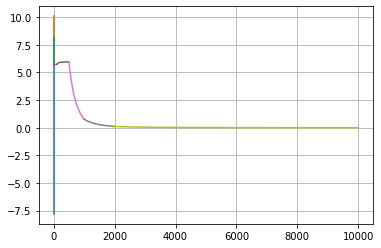

In [ ]:
#radial stress
plt.plot(r_1, sigma_r_inj1)
plt.plot(r_2, sigma_r_inj2)
plt.plot(r_3, sigma_r_inj3)
plt.plot(r_4, sigma_r_inj4)
plt.plot(r_5, sigma_r_inj5)
plt.plot(r_6, sigma_r_inj6)
plt.plot(r_7, sigma_r_inj7)
plt.plot(r_8, sigma_r_inj8)
plt.plot(r_9, sigma_r_inj9)
plt.grid()


In [ ]:
df = pd.DataFrame(r_1, sigma_r_inj1)
dk = pd.DataFrame(r_2, sigma_r_inj2)
di = pd.DataFrame(r_3, sigma_r_inj3)
dm = pd.DataFrame(r_4, sigma_r_inj4)
da = pd.DataFrame(r_5, sigma_r_inj5)
dz = pd.DataFrame(r_6, sigma_r_inj6)
dr = pd.DataFrame(r_7, sigma_r_inj7)
du = pd.DataFrame(r_8, sigma_r_inj8)
dt = pd.DataFrame(r_9, sigma_r_inj9)


df.to_csv("out1.csv")
dk.to_csv("out2.csv")
di.to_csv("out3.csv")
dm.to_csv("out4.csv")
da.to_csv("out5.csv")
dz.to_csv("out6.csv")
dr.to_csv("out7.csv")
du.to_csv("out8.csv")
dt.to_csv("out9.csv")


print(df)
print(dk)
print(di)
print(dm)
print(da)
print(dz)
print(dr)
print(du)
print(dt)

In [ ]:
# hoop stress

for i in range(20, 21):
  # steel
  sigma_h_inj1 =  sigma_h_inj(K_1, A_inj_1, G_1, B_inj_1, r_1, delta_inj_1)
  # cement
  sigma_h_inj2 =  sigma_h_inj(K_2, A_inj_2, G_2, B_inj_2, r_2, delta_inj_2)
  # formation
  sigma_h_inj3 =  sigma_h_inj(K_10, A_inj_3, G_10, B_inj_3, r_3, delta_inj_3)

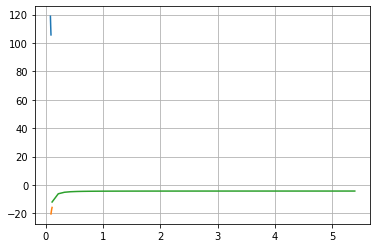

In [ ]:
#hoop stress
plt.plot(r_1, sigma_h_inj1)
plt.plot(r_2, sigma_h_inj2)
plt.plot(r_3, sigma_h_inj3)
plt.grid()


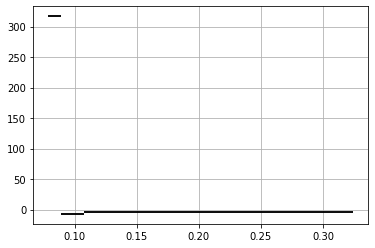

In [ ]:
#vertical stress

plt.hlines((sigma_v_inj_1, sigma_v_inj_1), R_1, R_2)
plt.hlines((sigma_v_inj_2, sigma_v_inj_2), R_2, R_3)
plt.hlines((sigma_v_inj_3, sigma_v_inj_3), R_3, 3 * R_3)
plt.grid()

In [ ]:
# multi-layered well structure

In [ ]:
#all_cases

n0 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 + G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 + G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 + G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 + G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 + G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 + G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, -2 * (K_9 + G_9 / 3), 2 * G_9, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1, -1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_9 + G_9 / 3), -2 * G_9 * (R_9 / R_10)**2, -2 * (K_10 + G_10 / 3), 2 * G_10, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_9**2 / R_10**2, -1, -1]], dtype=object)



l0 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_9 * alpha_9 * dT],
               [0],
               [3 * K_9 * alpha_8 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n0, l0

In [ ]:
#3555-3888 m

n5 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2,  2 * G_10],                      
               [0, 0, 1, R_2**2 / R_3**2, -1]])                                                                                                                                     
             



l5 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_10 * alpha_2 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n5, l5

(array([[ 3.98076923e+05, -1.59230769e+05,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.98076923e+05, -9.02394803e+04, -1.70555556e+04,
          1.02333333e+04,  0.00000000e+00],
        [ 1.00000000e+00,  5.66721374e-01, -1.00000000e+00,
         -1.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.70555556e+04,
         -8.27040438e+03,  6.66666667e+03],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          8.08182838e-01, -1.00000000e+00]]), array([[-6.417     ],
        [-6.2328    ],
        [ 0.        ],
        [ 0.01333333],
        [ 0.        ]]))

In [ ]:
# 506-2329

n3 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 + G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 + G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 + G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 + G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, 2 * G_10],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1]])

l3 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])

n3, l3


In [ ]:
A3_1 = np.dot(n3[0], l3) 
B3_1 = np.dot(n3[1], l3) * R_1**2
A3_2 = np.dot(n3[2], l3)
B3_2 = np.dot(n3[3], l3) * R_2**2
A3_3 = np.dot(n3[4], l3) 
B3_3 = np.dot(n3[5], l3) * R_3**2
A3_4 = np.dot(n3[6], l3) 
B3_4 = np.dot(n3[7], l3) * R_4**2
A3_5 = np.dot(n3[8], l3)
B3_5 = np.dot(n3[9], l3) * R_5**2
A3_6 = np.dot(n3[10], l3)
B3_6 = np.dot(n3[11], l3) * R_6**2
A3_7 = 0
B3_7 = np.dot(n3[12], l3) * R_7**2




A3_1, B3_1, A3_2, B3_2, A3_3, B3_3, A3_4, B3_4, A3_5, B3_5, A3_6, B3_6, B3_7, A3_7

(array([-1562006.07692308]),
 array([-8655.83642362]),
 array([-16.18206098]),
 array([-8310.30486849]),
 array([11.302367]),
 array([7000.40565335]),
 array([-10.39066183]),
 array([-15363.64936613]),
 array([10.04824482]),
 array([20968.66937772]),
 array([-5.32502464]),
 array([2.79976234]),
 array([-0.00053585]),
 0)

In [ ]:
#102-512 m

n2 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 * G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 * G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 * G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 * G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 * G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 * G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, 2 * G_10],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1]])



l2 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])

n2, l2

In [ ]:
A2_1 = np.dot(n2[0], l2) 
B2_1 = np.dot(n2[1], l2) * R_1**2
A2_2 = np.dot(n2[2], l2)
B2_2 = np.dot(n2[3], l2) * R_2**2
A2_3 = np.dot(n2[4], l2) 
B2_3 = np.dot(n2[5], l2) * R_3**2
A2_4 = np.dot(n2[6], l2) 
B2_4 = np.dot(n2[7], l2) * R_4**2
A2_5 = np.dot(n2[8], l2)
B2_5 = np.dot(n2[9], l2) * R_5**2
A2_6 = np.dot(n2[10], l2)
B2_6 = np.dot(n2[11], l2) * R_6**2
A2_7 = np.dot(n2[12], l2)
B2_7 = np.dot(n2[13], l2) * R_7**2
A2_8 = np.dot(n2[14], l2)
B2_8 = np.dot(n2[15], l2) * R_8**2
A2_9 = 0
B2_9 = np.dot(n2[16], l2) * R_9**2




A2_1, B2_1, A2_2, B2_2, A2_3, B2_3, A2_4, B2_4, A2_5, B2_5, A2_6, B2_6, B2_7, B2_7, A2_8, B2_8, B2_9, A2_9

(array([-1562006.07692308]),
 array([-8655.83642362]),
 array([-16.18206098]),
 array([-8310.30486849]),
 array([11.302367]),
 array([7000.40565335]),
 array([-10.39066183]),
 array([-15363.64936613]),
 array([10.04824482]),
 array([22386.27096789]),
 array([-11.6086913]),
 array([-29776.68341599]),
 array([39620.97991913]),
 array([39620.97991913]),
 array([-4.89763344]),
 array([5.79928604]),
 array([-0.00119623]),
 0)

In [ ]:
#0-102 m

n1 = np.array([[2 * (K_1 + G_1 / 3), -2 * G_1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                 
               [2 * (K_1 + G_1 / 3), -2 * G_1 * (R_1 / R_2)**2, -2 * (K_2 + G_2 / 3), 2 * G_2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                       
               [1, R_1**2 / R_2**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                        
               [0, 0, 2 * (K_2 + G_2 / 3), -2 * G_2 * (R_2 / R_3)**2, -2 * (K_3 + G_3 / 3), 2 * G_3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                      
               [0, 0, 1, R_2**2 / R_3**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],                                                                                                                                       
               [0, 0, 0, 0, 2 * (K_3 + G_3 / 3), -2 * G_3 * (R_3 / R_4)**2, -2 * (K_4 + G_4 / 3), 2 * G_4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, R_3**2 / R_4**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 2 * (K_4 + G_4 / 3), -2 * G_4 * (R_4 / R_5)**2, -2 * (K_5 + G_5 / 3), 2 * G_5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, R_4**2 / R_5**2, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_5 + G_5 / 3), -2 * G_5 * (R_5 / R_6)**2, -2 * (K_6 + G_6 / 3), 2 * G_6, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, R_5**2 / R_6**2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_6 + G_6 / 3), -2 * G_6 * (R_6 / R_7)**2, -2 * (K_7 + G_7 / 3), 2 * G_7, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_6**2 / R_7**2, -1, -1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_7 + G_7 / 3), -2 * G_7 * (R_7 / R_8)**2, -2 * (K_8 + G_8 / 3), 2 * G_8, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_7**2 / R_8**2, -1, -1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_8 + G_8 / 3), -2 * G_8 * (R_8 / R_9)**2, -2 * (K_9 + G_9 / 3), 2 * G_9, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_8**2 / R_9**2, -1, -1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2 * (K_9 + G_9 / 3), -2 * G_9 * (R_9 / R_10)**2, -2 * (K_10 + G_10 / 3)],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, R_9**2 / R_10**2, -1]], dtype=object)



l1 = np.array([[3 * K_1 * alpha_1 * dT - dPf],
               [3 * K_1 * alpha_1 * dT - 3 * K_2 * alpha_2 * dT],
               [0],
               [3 * K_2 * alpha_2 * dT - 3 * K_3 * alpha_3 * dT],
               [0],
               [3 * K_3 * alpha_3 * dT - 3 * K_4 * alpha_4 * dT],
               [0],
               [3 * K_4 * alpha_4 * dT - 3 * K_5 * alpha_5 * dT],
               [0],
               [3 * K_5 * alpha_5 * dT - 3 * K_6 * alpha_6 * dT],
               [0],
               [3 * K_6 * alpha_6 * dT - 3 * K_7 * alpha_7 * dT],
               [0],
               [3 * K_7 * alpha_7 * dT - 3 * K_8 * alpha_8 * dT],
               [0],
               [3 * K_8 * alpha_8 * dT - 3 * K_9 * alpha_9 * dT],
               [0],
               [3 * K_9 * alpha_9 * dT - 3 * K_10 * alpha_10 * dT],
               [0]])
n1, l1